# Preparing Colab for Assignment
FAQ on this [doc](https://docs.google.com/document/d/1eZP6pzl1RKNefTja7-nU_C1k1cpVqh4Y0eVmdb3ZQa8/edit?usp=sharing).

## Utils

In [ ]:
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

## Download the Dataset

In [ ]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1Z73UHw9IS492qxHvNUiB7-DidVl_ePfg'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:
!unzip -q dataset.zip
!rm -rf dataset.zip

replace dataset/Image1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# Metrics
Here you need to complete the MSE and PSNR metrics formula which will be used later on to test the automated grader. Please do not change the function definitions. Else the grader will fail.

Objective: To complete the given functions for **0.6 mark** each.


In [ ]:
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import math

def MSE(image1,image2):
  """ 
  Mean Squared Error
  :param image1: image1
  :param image2: image2
  :rtype: float
  :return: MSE value
  """
  # [TODO]
  mse_val = np.square(np.subtract(image1,image2)).mean()
  return mse_val

def PSNR(image1, image2, peak=255):

  """ 
  Peak signal-to-noise ratio
  :param image1: image1
  :param image2: image2
  :param peak: max value of pixel 8-bit image (255)
  :rtype: float
  :return: PSNR value
  """
  # [TODO]
  mse = MSE(image1,image2)
  if mse==0:
    return 1000 # implies PSNR makes no sense as MSE is 0 thus no noise
  max_intensity = 255.0
  psnr = 20* np.log10(max_intensity/np.sqrt(mse))
  return psnr

In [ ]:
#@title Grader { vertical-output: true }
seed =  200#@param {type:"integer"}
# Grader, please don't touch [Can run to check] [seed will be changed later]
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

np.random.seed(seed)
image1 = np.random.randint(0,256,(1280,720,3))
image2 = np.random.randint(0,256,(1280,720,3))

print(f"Skimage -> PSNR: {peak_signal_noise_ratio(image1,image2,data_range=255):.4f} | MSR: {mean_squared_error(image1,image2):.4f}")
print(f"My Func -> PSNR: {PSNR(image1,image2):.4f} | MSR: {MSE(image1,image2):.4f}")

Skimage -> PSNR: 7.7475 | MSR: 10922.7525
My Func -> PSNR: 7.7475 | MSR: 10922.7525


# Creating Noisy Images
***Objective:*** To complete the given class functions for **1 mark** each. 

>  MSE: To match within error of +- 2.0 \
  PSNR: To match within error of +- 200.0


## Salt n Pepper Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

## Gaussian Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Gaussian_noise). 

In [ ]:
from skimage.util import random_noise
import numpy as np

class noisy_system():
  def example(self,img,**kwargs):
    """
    An example function to test expected return.
    You can read more about skimage.util.random_noise at https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
    """
    noisy_image = random_noise(img,**kwargs)
    noisy_image = np.uint8(noisy_image*255)
    return noisy_image

  def create_salt_and_pepper_noise(self,img,amount=0.05):
    """
    function to create salt and pepper noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    
    """
    # [TODO]  

    image = np.copy(img)
    width,height = image.shape
    all_pixels = width*height
    per = amount/2
    num_pixels = round(per*all_pixels)  #The number of pixels in which noise has to be created
    for i in range(num_pixels):
      # select a random pixel from the bounds of the image
      y_pixel_1 = np.random.randint(0,width-1)
      x_pixel_1 = np.random.randint(0,height-1)
      # make that pixel white
      image[y_pixel_1][x_pixel_1] = 255
      # select another random pixel from the bounds of the image
      y_pixel_2 = np.random.randint(0,width-1)
      x_pixel_2 = np.random.randint(0,height-1)

      # make that pixel black
      image[y_pixel_2][x_pixel_2] = 0

    return image

  def create_gaussian_noise(self,img,mean=0,var=0.01):
    """
    function to create gaussian noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
    # [TODO]
    image = np.copy(img)
    # getting image dimensions
    width,height = image.shape
    # creating gaussian noise based on the mean and variance
    gaussian_noise = np.random.normal(mean, np.sqrt(var),(width,height))
    max_intensity = 255
    gaussian_noise = max_intensity*gaussian_noise
    gaussian_noise = gaussian_noise.astype(np.uint8)
    # adding noise to the image
    image =  np.add(image,gaussian_noise)
    return image

Total Time taken: 0.08s

Statistics:
Example   => SNP -> PSNR: 40.81 | MSE: 5.40
Example   => GSN -> PSNR: 28.41 | MSE: 93.67
My Func   => SNP -> PSNR: 40.93 | MSE: 5.25
My Func   => GSN -> PSNR: 28.46 | MSE: 92.81


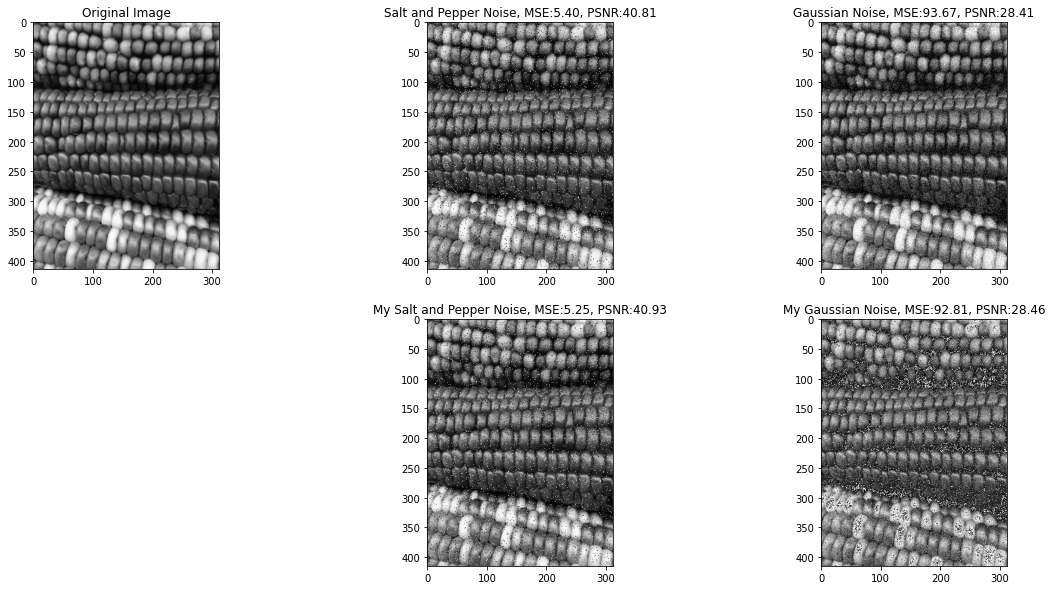

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 2 #@param {type:"slider", min:1, max:10, step:1}
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

start = time.time()

noise_maker               = noisy_system()
image                     = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                     = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

salt_and_pepper_example   = noise_maker.example(image.copy(),mode="s&p")
gaussian_example          = noise_maker.example(image.copy(),mode="gaussian")
salt_and_pepper_image     = noise_maker.create_salt_and_pepper_noise(image.copy())
gaussian_image            = noise_maker.create_gaussian_noise(image.copy())

end = time.time()
print(f"Total Time taken: {end-start:.2f}s\n")
print("Statistics:")
print(f"Example   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Example   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
print(f"My Func   => GSN -> PSNR: {PSNR(gaussian_image,image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")


plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
plt.subplot(2,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(2,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(2,3,5)
show_gray(salt_and_pepper_image,
          f"My Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_image):.2f}, PSNR:{PSNR(image,salt_and_pepper_image):.2f}")
plt.subplot(2,3,6)
show_gray(gaussian_image,
          f"My Gaussian Noise, MSE:{MSE(image,gaussian_image):.2f}, PSNR:{PSNR(image,gaussian_image):.2f}")
plt.show()

# Non Local Means

***Primary Objective:*** To complete Non Local Means denoiser. **2 marks** for completetion.

***Secondary Objective:*** 
1. To optimise for **MSE**. (out of 1 mark *relatively*)
2. To optimise for **time**.  (out of 1 mark *relatively*)

In [ ]:
class NLMeans():
  """
  Non Local Means, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """
  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image

  def get_submatrix(self, x, y, window, img_b):
    h, w, c = img_b.shape
    size = window//2
    neighbourhood = np.zeros((window, window, c))
    x_min, x_max = max(0, x-size), min(w, x+size+1)
    y_min, y_max = max(0, y-size), min(h, y+size+1)

    # Get the correct size of neighbourhood submatrix
    neighbourhood[size - (y-y_min):size + (y_max-y), size - (x-x_min):size + (x_max-x)] = img_b[y_min:y_max, x_min:x_max]

    return neighbourhood

  def get_submatrix_vectorized(self, small_window, big_window, img, img_b):
    """
    Vectorized implementation of get submatrix function to 
    find 7x7 window for each pixel considered as central pixel in the 21x21 window
    """
    height, width = img.shape
    submatrix = np.zeros((height+big_window-1, width+big_window-1, small_window, small_window))

    for y in range(height+big_window-1):
      for x in range(width+big_window-1):
        submatrix[y, x] = np.squeeze(self.get_submatrix((x+((small_window-1)//2)), (y+((small_window-1)//2)),
                                                              small_window, img_b[:, :, np.newaxis]))
    return submatrix
  
  def euclidean_Distance(self,x,y):
    """
    provides a single vector of euclidean distances of x and y vectors
    """
    return np.sqrt(np.sum(np.square(np.subtract(x,y)), axis=2)) #return the required term


  def solve(self,img,h=10,small_window=7,big_window=21):
    """
    Solve function to perform nlmeans filtering.

    :param img: noisy image
    :param h: sigma h (as mentioned in the paper)
    :param small_window: size of small window
    :param big_window: size of big window
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO]

    image = np.copy(img) #create image copy for avoiding refernce issues
    width, height = image.shape # 
    # print("width:",width)
    # print("height:",height)

    # Adding padding to the image to account for edge pixels to ensure we can make 21x21 window around them
    pad_val = ((big_window//2) + (small_window//2))
    image_padded = np.pad(image, pad_val)


    # getting submatrix of size 7x7 around each pixel in the larger 21x21 window
    neighbourhood = self.get_submatrix_vectorized(small_window, big_window, image, image_padded)

    # Define output matrix as zeros maintaining the dimension of the original image
    output = np.zeros((width,height))

    image_reshaped = np.reshape(neighbourhood, (width+big_window-1, height+big_window-1, small_window*small_window))

    for Y in range(width):
      for X in range(height):
        # Add correction in coordinates with repsect to padding
        x_corrected, y_corrected = X + (big_window//2), Y + (big_window//2)

        # Get 7x7 submatrix around pixel i
        v_N_i = self.get_submatrix(x_corrected, y_corrected, big_window, image_reshaped)
        
        # Get 7x7 submatrix around pixel j
        v_N_j = neighbourhood[y_corrected, x_corrected].flatten()

        # Find the exponential term used in normalizing constant calculation
        exp_term = np.exp(-(self.euclidean_Distance(v_N_i, v_N_j))/(h**2))

        # Calculating Z by summing the exponential terms over all j's
        Z = np.sum(exp_term)

        # Calculating average pixel value
        average_pixel = np.squeeze(self.get_submatrix(x_corrected+((small_window-1)//2), y_corrected+((small_window-1)//2), big_window, image_padded[:, :, None]))

        # Calculate the final numerator of weight of pixel i
        NL = np.sum(exp_term*average_pixel)

        # Storing final NL value in output matrix
        output[Y, X] = NL/Z

    return output


# [TODO]
# Will be checked on image 3.
# Report your best salt_and_pepper_h: 10
# Report your best gaussian_h: 9

(Inbuilt) Time taken: 0.26s

(My function) Time taken: 15.55s

Statistics:
salt_and_paper_h: 10 , gaussian_h: 10

Noisy   => SNP -> PSNR: 41.42 | MSE: 4.69
Noisy   => GSN -> PSNR: 28.65 | MSE: 88.64
Skimage => SNP -> PSNR: 39.98 | MSE: 6.53
Skimage => GSN -> PSNR: 28.75 | MSE: 86.67
My Func => SNP -> PSNR: 24.36 | MSE: 238.33
My Func => GSN -> PSNR: 25.63 | MSE: 177.94



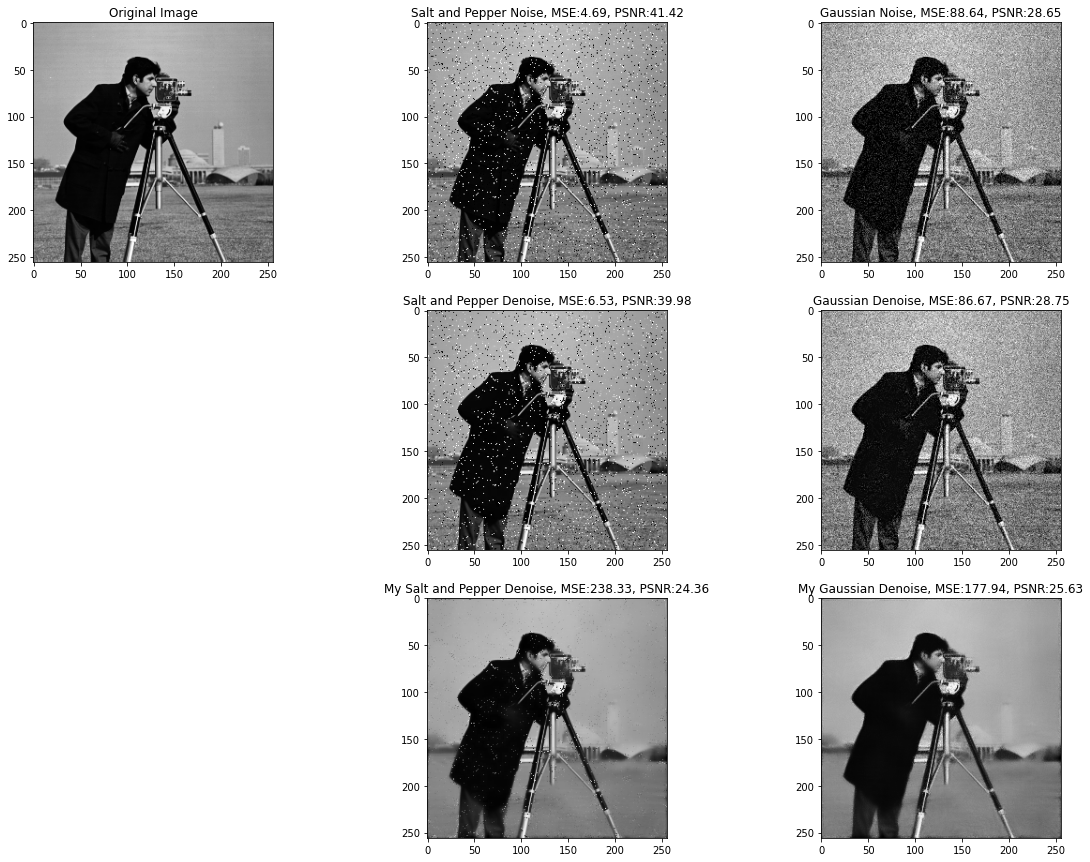

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 3 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =  10#@param {type:"integer"}
gaussian_h =         10#@param {type:"integer"}
 
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")
 
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
show_gray(image,"Original Image")
plt.subplot(3,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(3,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(3,3,5)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,6)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(3,3,8)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,9)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
plt.show()

# Gaussian Filtering Comparison

***Objective:*** Show comparison between NL Means denoising and Gaussian Denoising.  **0.8 mark**

In [ ]:
class GaussianFilter():
  """
  GaussianFilter, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """

  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image
  
  def solve(self, img, ksize=(5,5), sigma_x=0):
    """
    Solve function to perform gaussian filtering.

    :param img: noisy image
    :param ksize: representing the size of the kernel.
    :param sigma_x: standard deviation in X direction
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO] Can use cv2 inbuilt 
    img = cv2.GaussianBlur(img,ksize,sigma_x)
    return img

In [ ]:
""" 
Finding the optimal values of h_snp and h_gsn corresponding to image 3
"""
import cv2
from IPython.display import clear_output
import csv

clear_output(wait=True)

image_number = 3 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 



# Saving all stats in a csv for documentation
with open('h_gaussian_values.csv', 'w') as f: #alternate to h_snp_values.csv in next iteration
  writer_gn = csv.writer(f)
  header = ['Type','PSNR','MSE','snp_h','gaussian_h']
  writer_gn.writerow(header)
  print("wrote row")
  for l in range(5,20,2):
    gaussian_h = l
  
    # salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
    gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
  
    # my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
    my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
    
    print("Stats for gaussian h value:",l)
    print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
    # print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
    print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
    # print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
    print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
    # print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
    print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
    print("#########")
    print("#########")
    print("#########")
    
    # Logs in CSV
    # # FOR SNP

    # l1 = ['Noisy',PSNR(salt_and_pepper_example,image),MSE(salt_and_pepper_example,image),salt_and_paper_h,gaussian_h]
    # l2 = ['Skimage',PSNR(salt_and_pepper_denoise,image),MSE(salt_and_pepper_denoise,image),salt_and_paper_h,gaussian_h]
    # l3 = ['My Func',PSNR(my_salt_and_pepper_denoise,image),MSE(my_salt_and_pepper_denoise,image),salt_and_paper_h,gaussian_h]
    # writer_snp.writerow(l1)
    # writer_snp.writerow(l2)
    # writer_snp.writerow(l3)
    # writer_snp.writerow([])
    # writer_snp.writerow([])

    # FOR GAUSSIAN
    l1 = ['Noisy',PSNR(gaussian_example,image),MSE(gaussian_example,image),salt_and_paper_h,gaussian_h]
    l2 = ['Skimage',PSNR(gaussian_denoise,image),MSE(gaussian_denoise,image),salt_and_paper_h,gaussian_h]
    l3 = ['My Func',PSNR(my_gaussian_denoise,image),MSE(my_gaussian_denoise,image),salt_and_paper_h,gaussian_h]
    writer_gn.writerow(l1)
    writer_gn.writerow(l2)
    writer_gn.writerow(l3)
    writer_gn.writerow([])
    writer_gn.writerow([])


wrote row
Statistics for gaussian h value: 5
salt_and_paper_h: 30 , gaussian_h: 5

Noisy   => GSN -> PSNR: 28.69 | MSE: 88.01
Skimage => GSN -> PSNR: 28.69 | MSE: 88.01
My Func => GSN -> PSNR: 20.72 | MSE: 550.90

#########
#########
#########
Statistics for gaussian h value: 7
salt_and_paper_h: 30 , gaussian_h: 7

Noisy   => GSN -> PSNR: 28.69 | MSE: 88.01
Skimage => GSN -> PSNR: 28.69 | MSE: 87.93
My Func => GSN -> PSNR: 24.73 | MSE: 219.05

#########
#########
#########
Statistics for gaussian h value: 9
salt_and_paper_h: 30 , gaussian_h: 9

Noisy   => GSN -> PSNR: 28.69 | MSE: 88.01
Skimage => GSN -> PSNR: 28.75 | MSE: 86.66
My Func => GSN -> PSNR: 26.69 | MSE: 139.33

#########
#########
#########
Statistics for gaussian h value: 11
salt_and_paper_h: 30 , gaussian_h: 11

Noisy   => GSN -> PSNR: 28.69 | MSE: 88.01
Skimage => GSN -> PSNR: 28.78 | MSE: 86.21
My Func => GSN -> PSNR: 24.12 | MSE: 251.92

#########
#########
#########
Statistics for gaussian h value: 13
salt_and_paper_h

## Comparision of Gaussian and NLM Denoising

In [ ]:
import cv2
from IPython.display import clear_output
clear_output(wait=True)
 
# These values of h_snp and h_gsn have been obtained from the tabulation done in the above code segment.

salt_and_paper_h =  9.0  
gaussian_noise_h =  11.0 
 
denoiser_NLM                = NLMeans()
denoiser_Gaussian           = GaussianFilter()

with open('compare_gaussian_NLM.csv', 'w') as f:
  writer = csv.writer(f)
  header = ['Image Num','Type of Noise','Noisy','Noisy','Inbuilt Non Local','Inbuilt Non Local','My Non Local','My Non Local','Gaussian','Gaussian']
  writer.writerow(header)
  second = ['','','PSNR','MSE','PSNR','MSE','PSNR','MSE','PSNR','MSE']
  writer.writerow(second)
  for image_number in range(1,11):
    image = cv2.imread(f"/content/dataset/Image{image_number}.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # generating both kinds of noise
    salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
    gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
    noisy_MSE_snp = MSE(salt_and_pepper_example,image)
    noise_PSNR_snp = PSNR(salt_and_pepper_example,image)
    noisy_MSE_gaussian = MSE(gaussian_example,image)
    noisy_PSNR_gaussian = PSNR(gaussian_example,image)
    
    # INBUILT NLM 
    # denoising salt and pepper noised image with inbuilt NLM
    salt_and_pepper_denoise     = denoiser_NLM.example(salt_and_pepper_example.copy(),h=salt_and_paper_h) 
    psnr_salt_and_pepper_denoise = PSNR(salt_and_pepper_denoise,image)
    mse_salt_and_pepper_denoise = MSE(salt_and_pepper_denoise,image)
    # denoising gaussian noised image with inbuilt NLM
    gaussian_denoise     = denoiser_NLM.example(gaussian_example.copy(),h=gaussian_h)
    psnr_gaussian_denoise = PSNR(gaussian_denoise,image)
    mse_gaussian_denoise = MSE(gaussian_denoise,image)


    # MY implementation of NLM  
    # denoising salt and pepper noised image with my NLM
    my_salt_and_pepper_denoise_NLM  = denoiser_NLM.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
    psnr_myNLM_salt_and_pepper_denoise = PSNR(my_salt_and_pepper_denoise_NLM,image)
    mse_myNLM_salt_and_pepper_denoise = MSE(my_salt_and_pepper_denoise_NLM,image)
    # denoising gaussian noised image with my NLM
    my_gaussian_denoise_NLM  = denoiser_NLM.solve(gaussian_example.copy(),h=gaussian_h)
    psnr_myNLM_gaussian_denoise = PSNR(my_gaussian_denoise_NLM,image)
    mse_myNLM_gaussian_denoise  = MSE(my_gaussian_denoise_NLM,image)

    # MY IMPLEMENTATION of Gaussian Filtering
    # denoising salt and pepper noised image with my Gaussian
    my_salt_and_pepper_denoise_Gaussian  = denoiser_Gaussian.solve(salt_and_pepper_example.copy())
    psnr_myGauss_salt_and_pepper_denoise_Gaussian = PSNR(my_salt_and_pepper_denoise_Gaussian,image)
    mse_myGauss_salt_and_pepper_denoise_Gaussian  = MSE(my_salt_and_pepper_denoise_Gaussian,image)
    # denoising gaussian noised image with my Gaussian
    my_gaussian_denoise_Gaussian         = denoiser_Gaussian.solve(gaussian_example.copy())
    psnr_myGauss_my_gaussian_denoise_Gaussian = PSNR(my_gaussian_denoise_Gaussian,image)
    mse_myGauss_my_gaussian_denoise_Gaussian  = MSE(my_gaussian_denoise_Gaussian,image)

    row1 = [image_number,'SNP',noise_PSNR_snp,noisy_MSE_snp,
            psnr_salt_and_pepper_denoise,mse_salt_and_pepper_denoise,
            psnr_myNLM_salt_and_pepper_denoise,mse_myNLM_salt_and_pepper_denoise,
            psnr_myGauss_salt_and_pepper_denoise_Gaussian,mse_myGauss_salt_and_pepper_denoise_Gaussian]
    row2 = [image_number,'GSN',noisy_PSNR_gaussian,noisy_MSE_gaussian,
            psnr_gaussian_denoise,mse_gaussian_denoise,
            psnr_myNLM_gaussian_denoise,mse_myNLM_gaussian_denoise,
            psnr_myGauss_my_gaussian_denoise_Gaussian,mse_myGauss_my_gaussian_denoise_Gaussian]
    writer.writerow(row1)
    writer.writerow(row2)
    print("row added to csv")

row added to csv
row added to csv
row added to csv
row added to csv
row added to csv
row added to csv
row added to csv
row added to csv
row added to csv
row added to csv


In [ ]:
for image_number in range(1,11):
    image = cv2.imread(f"/content/dataset/Image{image_number}.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    SNP  = denoiser_Gaussian.solve(salt_and_pepper_example.copy())
    GDN         = denoiser_Gaussian.solve(gaussian_example.copy())
    # MSE() NIKAL LE DONO KA 
    psnr_saltnp_Gaussian = PSNR(SNP,image)
    mse_snp_denoise_Gaussian  = MSE(SNP,image)
    psnr_gsn_Gaussian = PSNR(GDN,image)
    mse_sng_Gaussian  = MSE(GDN,image)
